# Office Supplies Data (P2- OfficeSupplies Data.csv)

## 1. Sales Analysis:
   - What are the total sales for each product category?
   - Which product category has the highest sales?
   - Identify the top 10 best-selling products.


In [1]:
import pandas as pd

# Load the CSV file
file_path = 'P2- OfficeSupplies Data.csv'
office_supplies_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
office_supplies_data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [2]:
# Add a column for total sales (Units * Unit Price)
office_supplies_data['Total Sales'] = office_supplies_data['Units'] * office_supplies_data['Unit Price']

# Total sales for each product category
total_sales_by_product = office_supplies_data.groupby('Item')['Total Sales'].sum().reset_index()

# Display the result
total_sales_by_product

,Item,Total Sales
0,Binder,9577.65
1,Desk,1700.00
2,Pen,2045.22
3,Pen Set,4169.87
4,Pencil,2135.14


In [3]:
# Product category with the highest sales
highest_sales_product = total_sales_by_product.loc[total_sales_by_product['Total Sales'].idxmax()]

# Display the result
highest_sales_product

Item            Binder
Total Sales    9577.65
Name: 0, dtype: object

In [4]:
# Top 10 best-selling products by total sales
top_10_best_selling_products = total_sales_by_product.sort_values(by='Total Sales', ascending=False).head(7)

# Display the result
top_10_best_selling_products

,Item,Total Sales
0,Binder,9577.65
3,Pen Set,4169.87
4,Pencil,2135.14
2,Pen,2045.22
1,Desk,1700.00


## 2.  Customer Analysis: 
   - Who are the top 10 customers by sales?
   - What is the total number of unique customers?
   - Analyze customer purchase frequency.


In [5]:
# Total sales for each customer
total_sales_by_customer = office_supplies_data.groupby('Rep')['Total Sales'].sum().reset_index()

# Top 10 customers by total sales
top_10_customers = total_sales_by_customer.sort_values(by='Total Sales', ascending=False).head(10)

# Display the result
top_10_customers

,Rep,Total Sales
3,Matthew,3109.44
9,Susan,3102.30
0,Alex,2812.19
7,Richard,2363.04
1,Bill,1749.87
8,Smith,1641.43
4,Morgan,1387.77
2,James,1283.61
10,Thomas,1203.11
5,Nick,536.75


In [6]:
# Calculate the total number of unique customers
unique_customers = office_supplies_data['Rep'].nunique()

# Display the result
print("Total number of unique customers are", unique_customers)

Total number of unique customers are 11


In [7]:
# Analyzing customer purchase frequency
customer_purchase_frequency = office_supplies_data['Rep'].value_counts().reset_index()
customer_purchase_frequency.columns = ['Rep', 'Purchase Frequency']

# Display the result
customer_purchase_frequency

,Rep,Purchase Frequency
0,Richard,8
1,Bill,5
2,Alex,5
3,Matthew,4
4,James,4
5,Rachel,4
6,Morgan,3
7,Susan,3
8,Smith,3
9,Nick,2


## 3.  Time Series Analysis: 
   - What are the monthly sales trends over the past year?
   - Identify any seasonal patterns in the sales data.


In [8]:
# Convert OrderDate to datetime
office_supplies_data['OrderDate'] = pd.to_datetime(office_supplies_data['OrderDate'])

# Add a column for total sales (Units * Unit Price)
office_supplies_data['Total Sales'] = office_supplies_data['Units'] * office_supplies_data['Unit Price']

# Extract year and month from OrderDate
office_supplies_data['YearMonth'] = office_supplies_data['OrderDate'].dt.to_period('M')

# Display the first few rows to confirm changes
office_supplies_data.head()


C:\Users\Taranjeet Kaur\AppData\Local\Temp\ipykernel_26456\386411462.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  office_supplies_data['OrderDate'] = pd.to_datetime(office_supplies_data['OrderDate'])


,OrderDate,Region,Rep,Item,Units,Unit Price,Total Sales,YearMonth
0,2014-07-04,East,Richard,Pen Set,62,4.99,309.38,2014-07
1,2014-07-12,East,Nick,Binder,29,1.99,57.71,2014-07
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95,2014-07
3,2014-07-29,East,Susan,Binder,81,19.99,1619.19,2014-07
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90,2014-08


In [9]:
# Group by YearMonth and calculate total monthly sales
monthly_sales_trends = office_supplies_data.groupby('YearMonth')['Total Sales'].sum().reset_index()

# Display the result
monthly_sales_trends


,YearMonth,Total Sales
0,2014-07,2673.23
1,2014-08,2005.55
2,2014-09,666.11
3,2014-10,1984.57
4,2014-11,833.78
5,2014-12,3288.47
6,2015-01,1602.09
7,2015-02,2044.33
8,2015-03,556.87
9,2015-04,1059.03


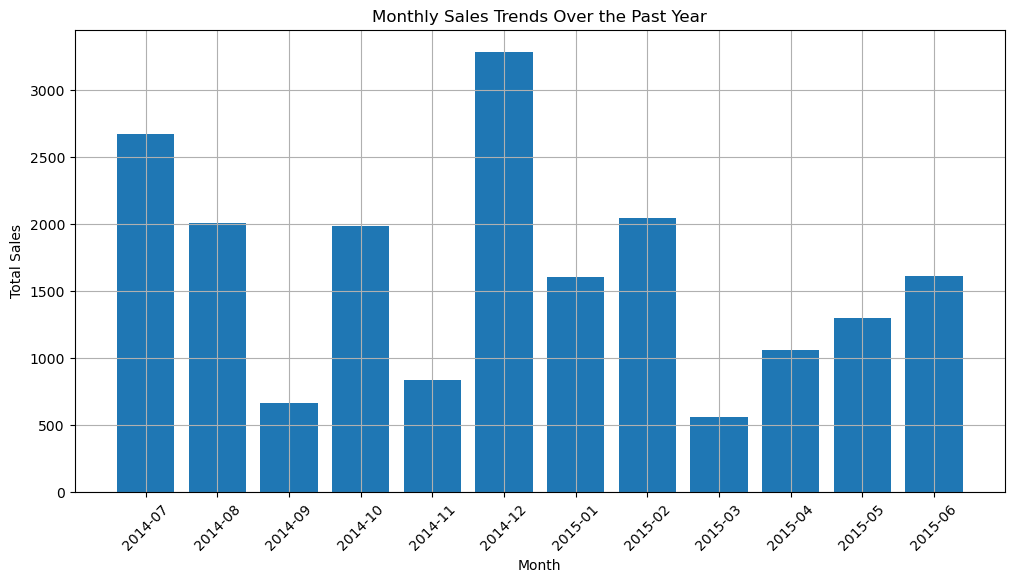

In [11]:
import matplotlib.pyplot as plt

# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_trends['YearMonth'].astype(str), monthly_sales_trends['Total Sales'])
plt.title('Monthly Sales Trends Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [12]:
# Set OrderDate as the index
office_supplies_data.set_index('OrderDate', inplace=True)

# Aggregate sales by month
monthly_sales = office_supplies_data['Total Sales'].resample('M').sum()

# Display the monthly sales
monthly_sales

OrderDate
2014-07-31    2673.23
2014-08-31    2005.55
2014-09-30     666.11
2014-10-31    1984.57
2014-11-30     833.78
2014-12-31    3288.47
2015-01-31    1602.09
2015-02-28    2044.33
2015-03-31     556.87
2015-04-30    1059.03
2015-05-31    1300.35
2015-06-30    1613.50
Freq: M, Name: Total Sales, dtype: float64

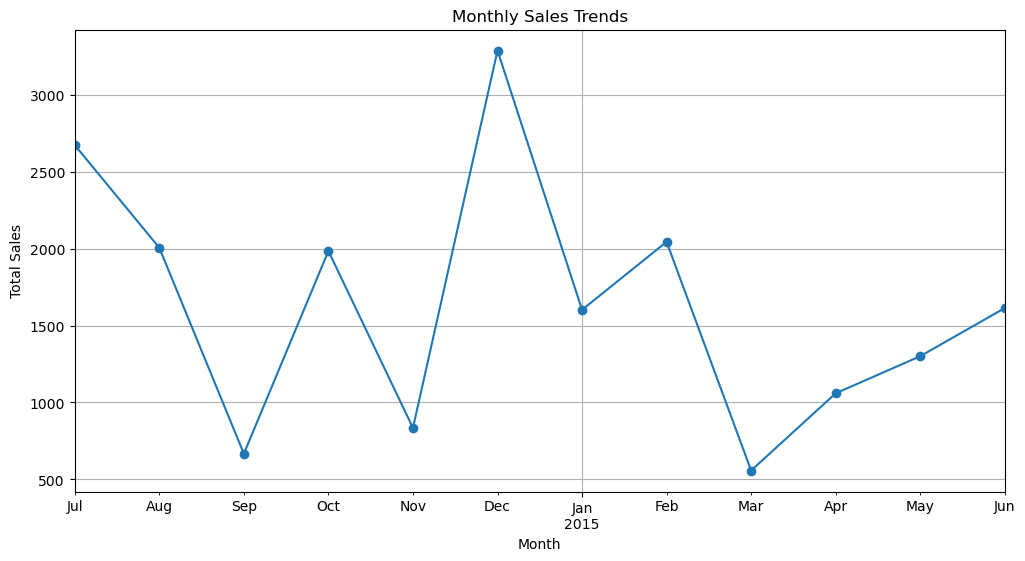

In [13]:
import matplotlib.pyplot as plt

# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

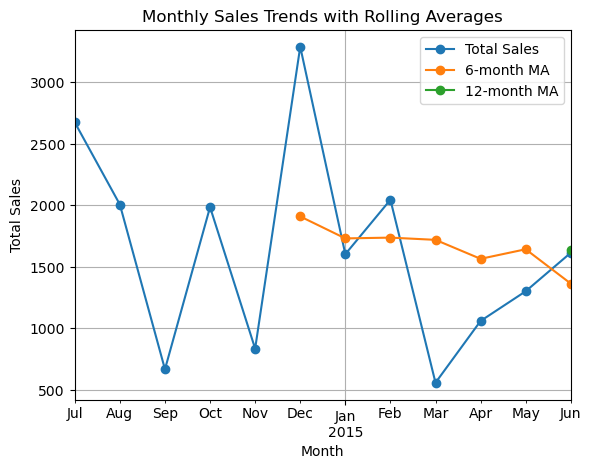

In [45]:
# Calculate rolling averages
monthly_sales_rolling = pd.DataFrame(monthly_sales)
monthly_sales_rolling['6-month MA'] = monthly_sales.rolling(window=6).mean()
monthly_sales_rolling['12-month MA'] = monthly_sales.rolling(window=12).mean()

# Plot the rolling averages
plt.figure(figsize=(12, 6))
monthly_sales_rolling.plot(marker='o')
plt.title('Monthly Sales Trends with Rolling Averages')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


## 4.  Geographical Analysis: 
   - Which regions generate the most sales?
   - What are the sales trends across different regions?


In [46]:
# Calculate total sales by region
sales_by_region = office_supplies_data.groupby('Region')['Total Sales'].sum()

# Display the sales by region
sales_by_region

Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64

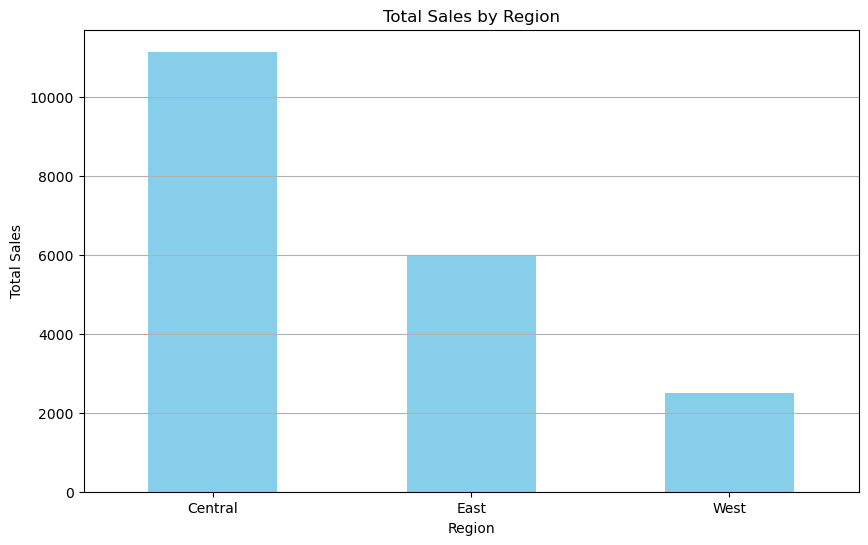

In [47]:
# Plot total sales by region
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


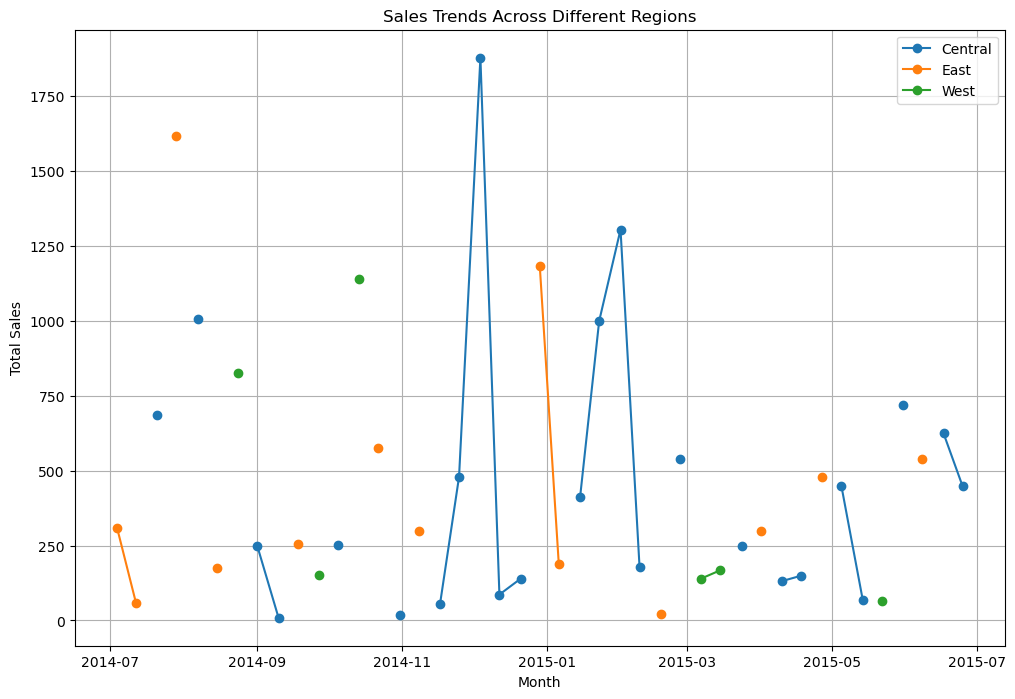

In [49]:
# Aggregate monthly sales by region
monthly_sales_by_region = office_supplies_data.pivot_table(values='Total Sales', index='OrderDate', columns='Region', aggfunc='sum')

# Plot sales trends for each region
plt.figure(figsize=(12, 8))
for region in monthly_sales_by_region.columns:
    plt.plot(monthly_sales_by_region.index, monthly_sales_by_region[region], marker='o', label=region)

plt.title('Sales Trends Across Different Regions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


## 5.  Profit Analysis: 
   - What is the total profit for each product category?
   - Identify the top 10 most profitable products.


In [50]:
# Assuming a fixed profit margin of 30%
profit_margin = 0.30
office_supplies_data['Total Profit'] = office_supplies_data['Total Sales'] * profit_margin

# Calculate total profit by product category
profit_by_category = office_supplies_data.groupby('Item')['Total Profit'].sum()

# Display the profit by product category
profit_by_category


Item
Binder     2873.295
Desk        510.000
Pen         613.566
Pen Set    1250.961
Pencil      640.542
Name: Total Profit, dtype: float64

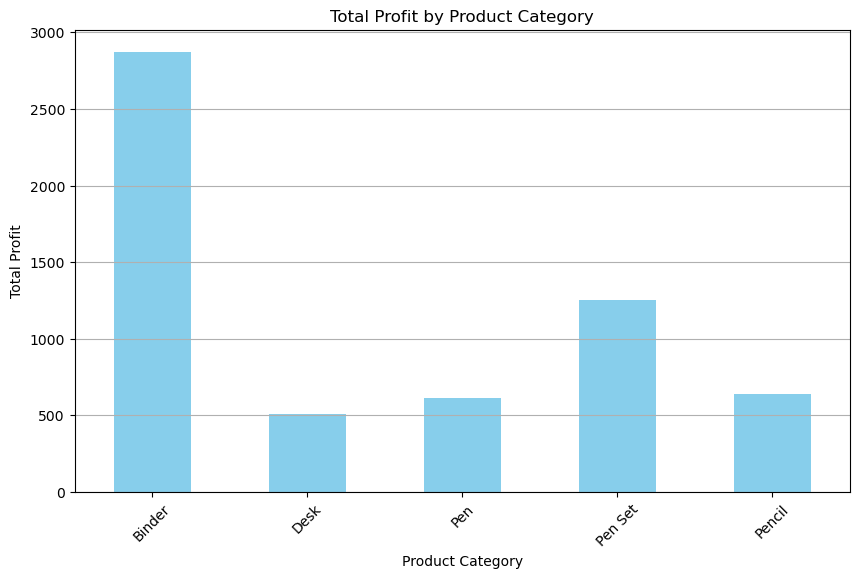

In [51]:
# Plot total profit by product category
plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [52]:
# Calculate total profit for each product
profit_by_product = office_supplies_data.groupby('Item')['Total Profit'].sum()

# Identify the top 10 most profitable products
top_10_profitable_products = profit_by_product.sort_values(ascending=False).head(10)

# Display the top 10 most profitable products
top_10_profitable_products


Item
Binder     2873.295
Pen Set    1250.961
Pencil      640.542
Pen         613.566
Desk        510.000
Name: Total Profit, dtype: float64